In [ ]:
from typing import TypedDict

# initialise the first state
class PortfolioState(TypedDict):
    # give the variable names with data type inside the state
    amount_usd: float 
    total_usd: float
    total_inr: float


In [ ]:
# create function for the first node
def calc_total(state: PortfolioState) -> PortfolioState: #define the data type of the input and output
    state['total_usd'] = state['amount_usd']*1.08 # we get 8% fix return
    return state #get the state as the output to pass to the next function

#create function to convert usd to inr
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd']*85 # we get 85 inr per usd
    return state

In [8]:
pip install langgraph

Defaulting to user installation because normal site-packages is not writeable
  Using cached xxhash-3.6.0-cp313-cp313-win_amd64.whl.metadata (13 kB)
Using cached xxhash-3.6.0-cp313-cp313-win_amd64.whl (31 kB)

   ---------------- -----------------------  4/10 [langsmith]
   ---------------- -----------------------  4/10 [langsmith]
   ---------------- -----------------------  4/10 [langsmith]
   ------------------------ ---------------  6/10 [langchain-core]
   ------------------------ ---------------  6/10 [langchain-core]
   ------------------------ ---------------  6/10 [langchain-core]
   ------------------------ ---------------  6/10 [langchain-core]
   ------------------------ ---------------  6/10 [langchain-core]
   ---------------------------- -----------  7/10 [langgraph-checkpoint]
   ------------------------------------ ---  9/10 [langgraph]
   ------------------------------------ ---  9/10 [langgraph]
   ---------------------------------------- 10/10 [langgraph]

Note: you

In [14]:
#define the graph
from langgraph.graph import StateGraph, END

#state is the portfolio state. that is what we need to pass as an input
builder = StateGraph(PortfolioState)

# add node to calculate total
builder.add_node("calc_total_node", calc_total)
# add convert to inr node
builder.add_node("convert_to_inr_node", convert_to_inr)

# set the entry point - start we need to calculate the total
builder.set_entry_point("calc_total_node")

#add edges
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

#compile the graph
graph = builder.compile()



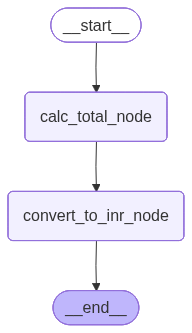

In [15]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
# invoke the graph
graph.invoke({"amount_usd": 1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}